Importing all necessary files

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

reading Data from file and making the dataframe

In [3]:
df=pd.read_csv('movie_data.csv')
df.head(10)

,Title,Rating,Genre,Release Date,Reviews Count,Rating Code,Duration
0,Twisters,77%,Action,In Theaters Fri Jul 19,91 Reviews,PG-13,2h 2m
1,Despicable Me 4,55%,Kids & Family,Now Playing,148 Reviews,PG,1h 35m
2,Paris Olympics on NBC at AMC Theatres,NaN,Sports,In Theaters Fri Jul 26,Reviews,R,4h 0m
3,NBC's Paris Olympics Opening Ceremony in IMAX,NaN,Sports,In Theaters Fri Jul 26,Reviews,PG-13,1h 41m
4,Longlegs,87%,Horror,Now Playing,202 Reviews,R,2h 12m
5,Fly Me to the Moon,66%,Romance,Now Playing,185 Reviews,R,2h 7m
6,Deadpool & Wolverine,NaN,Action,In Theaters Fri Jul 26,Reviews,R,1h 41m
7,MaXXXine,72%,Horror,Now Playing,239 Reviews,PG-13,2h 1m
8,Touch,93%,Romance,Now Playing,43 Reviews,PG,1h 40m
9,A Quiet Place: Day One,87%,Horror,Now Playing,252 Reviews,R,1h 36m


Handling Missing Values


In [4]:
df.isnull().sum()

Title             0
Rating           10
Genre             0
Release Date      0
Reviews Count     0
Rating Code      33
Duration         20
dtype: int64

Filling Missing Values for Rating 

In [5]:
df['Rating']
df['Rating'].value_counts()
df['Rating'].isnull().sum()
df['Rating'].fillna(df['Rating'].mode()[0],inplace=True)
df['Rating'].isnull().sum()



0

missing values for Rating

In [15]:
df['Rating Code'].value_counts()
df['Rating Code'].describe()
df['Rating Code'].fillna(df['Rating Code'].mode()[0],inplace=True)
df['Rating Code']
df['Rating Code'].isnull().sum()    

0

Missing Values for Duration

In [22]:
df['Duration'].value_counts()
df['Duration'].fillna(df['Duration'].mode()[0],inplace=True)
df['Duration']
df['Duration'].isnull().sum()
df.isnull().sum()   
df.head(10)

,Title,Rating,Genre,Release Date,Reviews Count,Rating Code,Duration
0,Twisters,77%,Action,In Theaters Fri Jul 19,91 Reviews,PG-13,2h 2m
1,Despicable Me 4,55%,Kids & Family,Now Playing,148 Reviews,PG,1h 35m
2,Paris Olympics on NBC at AMC Theatres,93%,Sports,In Theaters Fri Jul 26,Reviews,R,4h 0m
3,NBC's Paris Olympics Opening Ceremony in IMAX,93%,Sports,In Theaters Fri Jul 26,Reviews,PG-13,1h 41m
4,Longlegs,87%,Horror,Now Playing,202 Reviews,R,2h 12m
5,Fly Me to the Moon,66%,Romance,Now Playing,185 Reviews,R,2h 7m
6,Deadpool & Wolverine,93%,Action,In Theaters Fri Jul 26,Reviews,R,1h 41m
7,MaXXXine,72%,Horror,Now Playing,239 Reviews,PG-13,2h 1m
8,Touch,93%,Romance,Now Playing,43 Reviews,PG,1h 40m
9,A Quiet Place: Day One,87%,Horror,Now Playing,252 Reviews,R,1h 36m


checking Duplicates

In [36]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()   


0

In [40]:
summary_stats =df.describe()
print(summary_stats)
df['Title'].value_counts().head(10)


         Title Rating   Genre Release Date Reviews Count Rating Code Duration
count       90     90      90           90            90          90       90
unique      68     35      18           27            56           4       35
top     Thelma    93%  Comedy  Now Playing       Reviews           R   1h 41m
freq         3     19      16           43            10          62       28


Title
Thelma                                   3
Longlegs                                 3
Kinds of Kindness                        3
MaXXXine                                 3
Touch                                    3
Twisters                                 2
Sing Sing                                2
Season 1 – My Lady Jane                  2
Horizon: An American Saga - Chapter 1    2
Despicable Me 4                          2
Name: count, dtype: int64

visualization

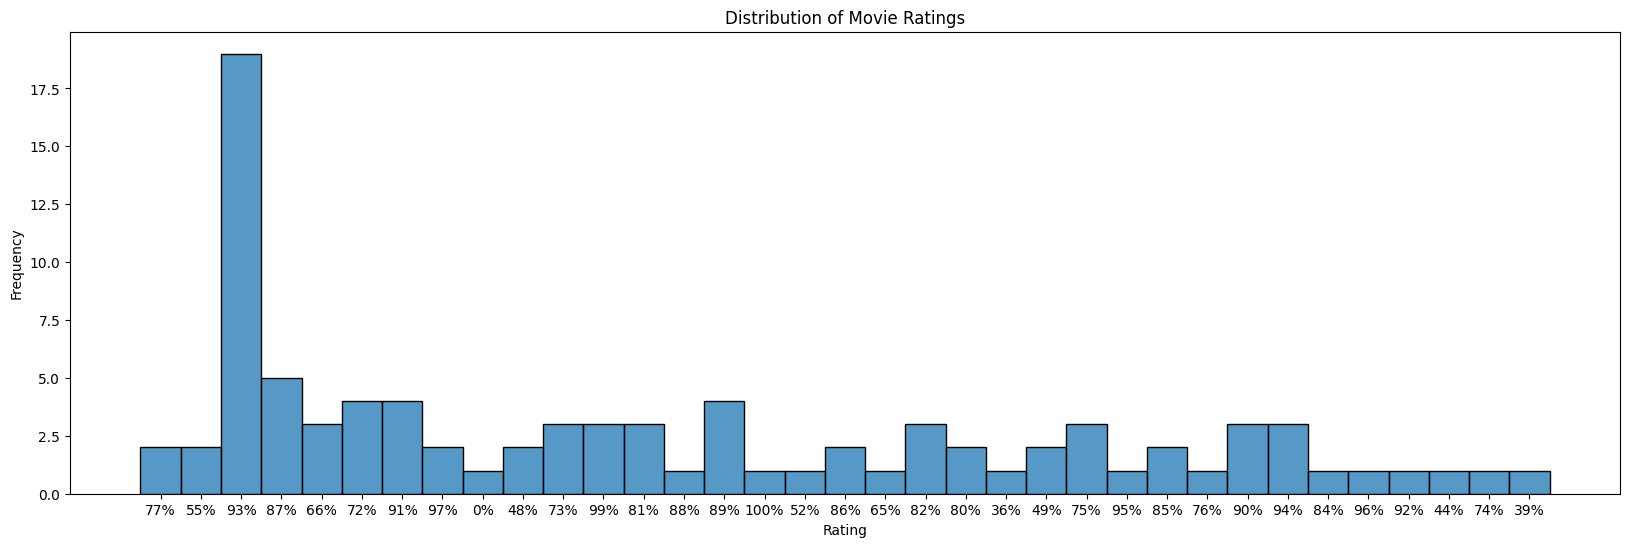

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))
sns.histplot(df['Rating'], bins=1)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


Count of Movies per Genre:


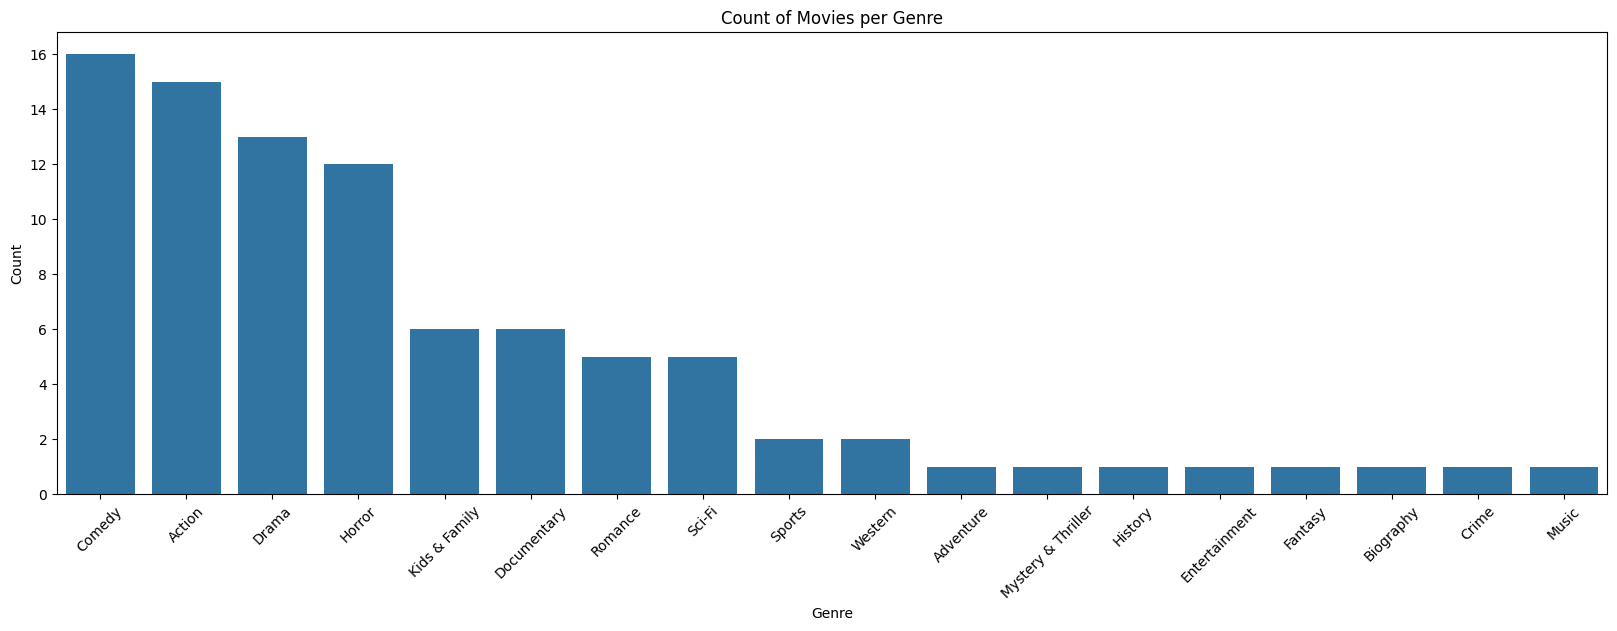

In [49]:
plt.figure(figsize=(20, 6))
genre_counts = df['Genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Count of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Ratings by Genre:

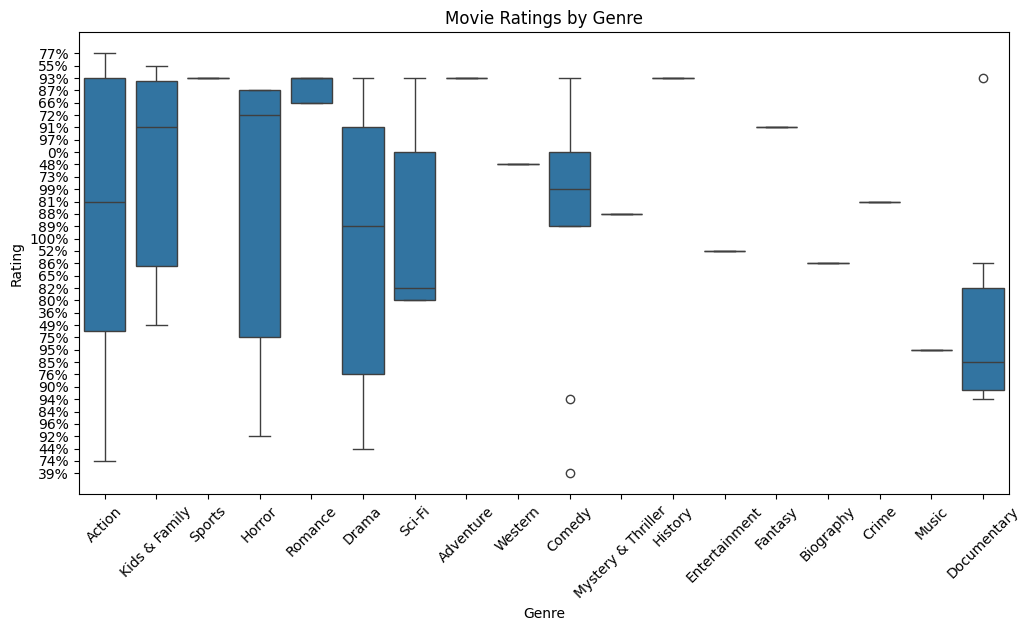

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Rating', data=df)
plt.title('Movie Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

Movie Duration Distribution:

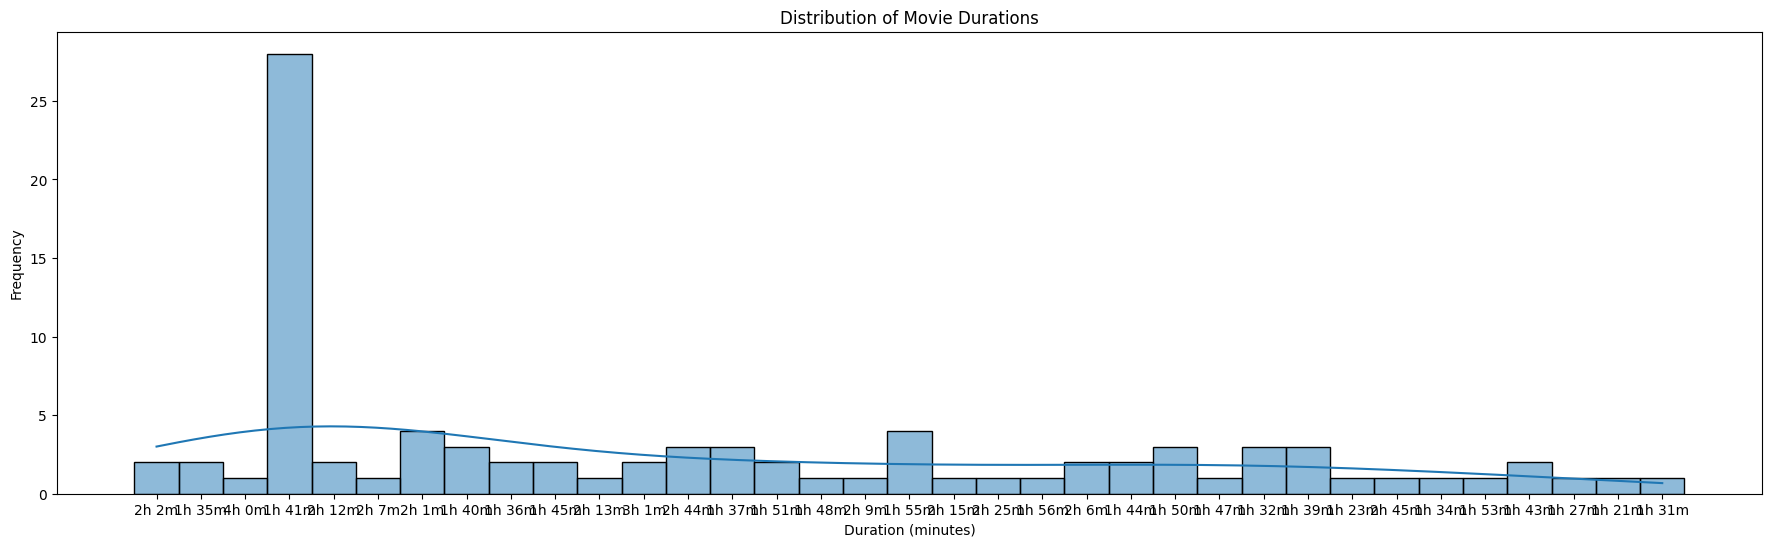

In [54]:
plt.figure(figsize=(22, 6))
sns.histplot(df['Duration'], bins=10, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

Reviews vs. Ratings:

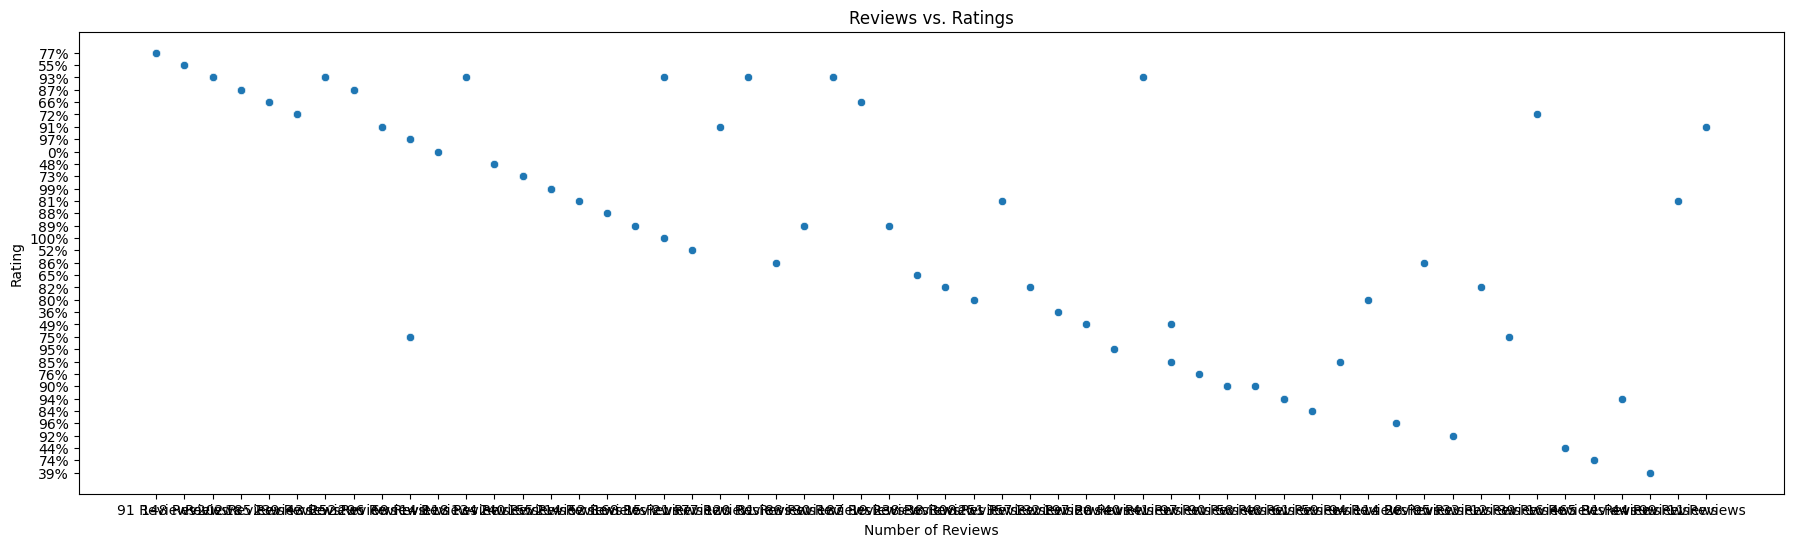

In [58]:
plt.figure(figsize=(22, 6))
sns.scatterplot(x='Reviews Count', y='Rating', data=df)
plt.title('Reviews vs. Ratings')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.show()
